In [17]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from sklearn.preprocessing import MinMaxScaler

In [18]:
data=yf.download(tickers="AFG")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-03-17,0.000000,6.416667,6.083333,6.083333,1.547045,175500
1980-03-18,0.000000,6.250000,5.875000,6.000000,1.525852,131400
1980-03-19,0.000000,6.250000,5.958333,5.958333,1.515256,30900
1980-03-20,0.000000,6.000000,5.791667,5.916667,1.504661,69600
1980-03-21,0.000000,6.083333,5.916667,5.958333,1.515256,23100
...,...,...,...,...,...,...
2022-01-10,138.440002,138.639999,134.309998,136.449997,135.891312,255500
2022-01-11,136.220001,136.779999,132.880005,136.149994,135.592529,271500
2022-01-12,136.389999,137.720001,135.580002,136.770004,136.210007,188500


In [10]:
data.to_csv("AFG.csv")

In [19]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-10,138.440002,138.639999,134.309998,136.449997,135.891312,255500
2022-01-11,136.220001,136.779999,132.880005,136.149994,135.592529,271500
2022-01-12,136.389999,137.720001,135.580002,136.770004,136.210007,188500
2022-01-13,136.649994,138.080002,135.330002,135.559998,135.559998,218200
2022-01-14,134.240005,135.669998,133.539993,135.570007,135.570007,170000


In [32]:
new_data=pd.DataFrame(data,columns=["Close"])
new_data

,Close
Date,
1980-03-17,6.083333
1980-03-18,6.000000
1980-03-19,5.958333
1980-03-20,5.916667
1980-03-21,5.958333
...,...
2022-01-10,136.449997
2022-01-11,136.149994
2022-01-12,136.770004


In [33]:
new_data.shape

(10548, 1)

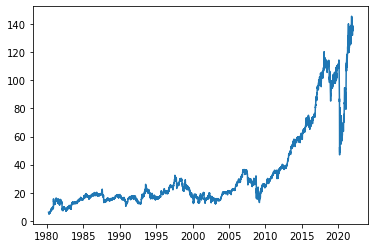

In [34]:
plt.plot(new_data)

In [40]:
#Conversion to Array
scaler=MinMaxScaler(feature_range=(0,1))
new_data=scaler.fit_transform(np.array(new_data).reshape(-1,1))

In [39]:
new_data.shape

(10548, 1)

In [47]:
#Utilizing a 75:25 ratio train to test
training_size=int(len(new_data)*0.75)
test_size=len(new_data)-training_size
train_data,test_data=new_data[0:training_size,:],new_data[training_size:len(new_data),:1]

In [48]:
training_size,test_size

(7911, 2637)

In [52]:
def create_dataset(dataset,time_step=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a= dataset[i:(i+time_step),0] #i=0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [53]:
time_step=100
x_train,y_train= create_dataset(train_data, time_step)
x_test,y_test= create_dataset(test_data, time_step)

In [57]:
#reshaping required to a 3-dimensional data structure:
x_train =x_train.reshape(x_train.shape[0],x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [58]:
#Creating Stacked-LSTM Model:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [65]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mean_squared_error",optimizer="adam")

In [66]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 100, 50)           10400     
                                                                 
 lstm_14 (LSTM)              (None, 100, 50)           20200     
                                                                 
 lstm_15 (LSTM)              (None, 50)                20200     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
123/123 [==============================] - 22s 150ms/step - loss: 4.1230e-04 - val_loss: 9.5533e-04
Epoch 2/100
123/123 [==============================] - 18s 146ms/step - loss: 5.2170e-05 - val_loss: 0.0011
Epoch 3/100
123/123 [==============================] - 19s 156ms/step - loss: 4.5990e-05 - val_loss: 7.5353e-04
Epoch 4/100
123/123 [==============================] - 15s 123ms/step - loss: 4.0530e-05 - val_loss: 5.9689e-04
Epoch 5/100
123/123 [==============================] - 15s 123ms/step - loss: 3.5428e-05 - val_loss: 5.0326e-04
Epoch 6/100
123/123 [==============================] - 15s 124ms/step - loss: 3.6103e-05 - val_loss: 4.9875e-04
Epoch 7/100
123/123 [==============================] - 16s 126ms/step - loss: 3.0957e-05 - val_loss: 9.4120e-04
Epoch 8/100
123/123 [==============================] - 15s 125ms/step - loss: 3.1851e-05 - val_loss: 4.5380e-04
Epoch 9/100
123/123 [==============================] - 15s 126ms/step - loss: 2.5831e-05 - val_loss: 3.8956e

In [69]:
import tensorflow as tf

In [70]:
tf.__version__

'2.7.0'

In [72]:
#check performance matrix
train_predict=model.predict(x_train)
test_predict=model.predict(x_test)

In [74]:
#Tansform to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [77]:
#Calculate RMSE Performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.002775339619955473

In [78]:
#Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

0.02457004846912706

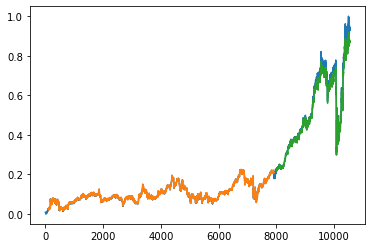

In [79]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(new_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(new_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(new_data)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(new_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

#Green is predicted values around the Blue which is the actual value

In [80]:
#now predicting the next 30 days

In [82]:
len(test_data)-100

2537

In [83]:
x_input=test_data[2537:].reshape(1,-1)
x_input.shape

(1, 100)

In [86]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [121]:
# demonstrate prediction for next 30 days (through i=30 loop)
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1

0 day input [0.53777283 0.52888465 0.52063191 0.51292896 0.50570422 0.49889854
 0.49246341 0.4863587  0.48055121 0.47501397 0.46972424 0.46466234
 0.45981267 0.45516059 0.45069379 0.44640085 0.44227168 0.43829709
 0.43446833 0.43077746 0.42721674 0.42377904 0.42045781 0.41724694
 0.41414037 0.41113278 0.40821865 0.40539357 0.40265286 0.39999232
 0.39740825 0.39489672 0.39245439 0.39007828 0.38776538 0.38551286
 0.38331836 0.38117924 0.37909329 0.37705839 0.3750726  0.37313399
 0.37124074 0.36939114 0.36758393 0.36581719 0.36408967 0.36239988
 0.36074656 0.35912859 0.3575446  0.35599357 0.35447443 0.35298598
 0.35152745 0.35009786 0.34869623 0.34732163 0.34597358 0.34465095
 0.34335309 0.34207919 0.34082869 0.33960077 0.33839488 0.33721039
 0.33604673 0.33490333 0.3337796  0.33267504 0.3315891  0.33052129
 0.32947108 0.32843807 0.32742196 0.32642224 0.32543847 0.32447028
 0.3235172  0.32257894 0.32165504 0.32074532 0.31984937 0.31896695
 0.31809768 0.31724131 0.31639737 0.31556582 0.314

In [126]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [127]:
len(new_data)-100

10448

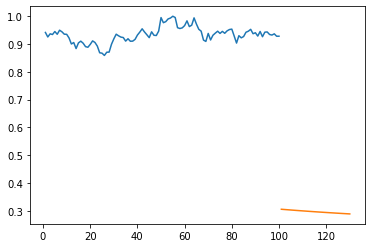

In [128]:
plt.plot(day_new,scaler.inverse_transform(new_data[10448:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

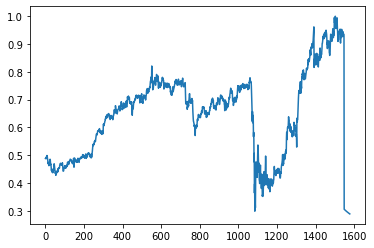

In [134]:
nd=new_data.tolist()
nd.extend(lst_output)
plt.plot(nd[9000:])

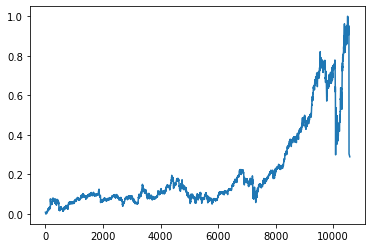

In [135]:
nd=scaler.inverse_transform(nd).tolist()
plt.plot(nd)